In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_percentage_error, log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df_orignals = df.copy()

In [4]:
# df_orignals

In [5]:
df.shape

(100000, 9)

In [6]:
df.head(6)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1


In [11]:
df["Gender"].replace({'Male':1, 'Female':0}, inplace=True)

In [12]:
df.describe()

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,0.497840,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,0.499998,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,0.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,0.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,1.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,1.000000,24.000000,100.000000,500.000000,1.000000


In [15]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [16]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [17]:
df.duplicated().sum()

0

<AxesSubplot:ylabel='Churn'>

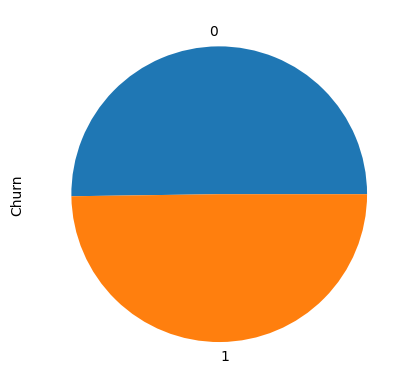

In [18]:
df['Churn'].value_counts().plot(kind='pie')

# churn data is balanced so no need to worry about less churn percent and not getting correct accuracy score

<AxesSubplot:xlabel='Churn', ylabel='count'>

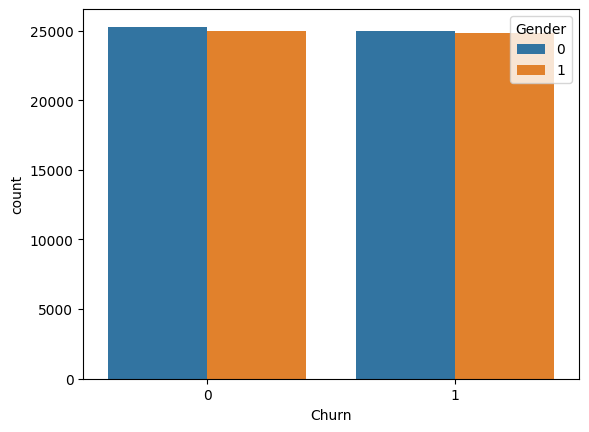

In [22]:
sns.countplot(x='Churn',data=df,hue='Gender')
sns

<AxesSubplot:xlabel='Location', ylabel='Churn'>

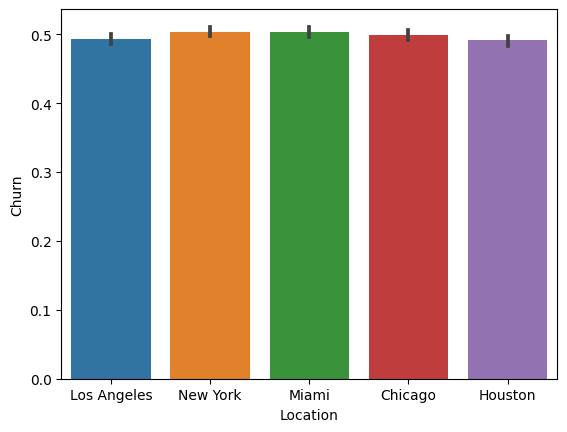

In [40]:
sns.barplot(y=df['Churn'], x=df['Location'])

<AxesSubplot:xlabel='Churn', ylabel='Age'>

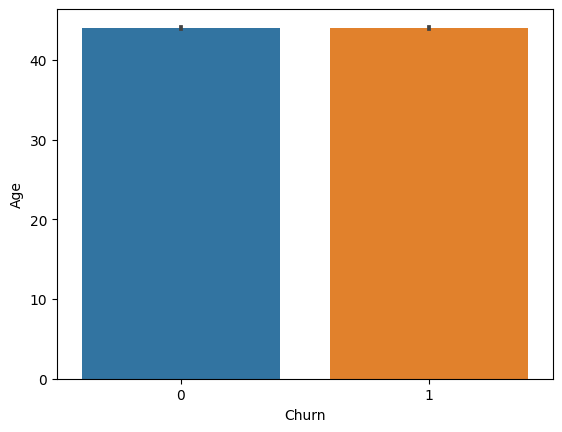

In [41]:
sns.barplot(y=df['Age'], x=df['Churn'])

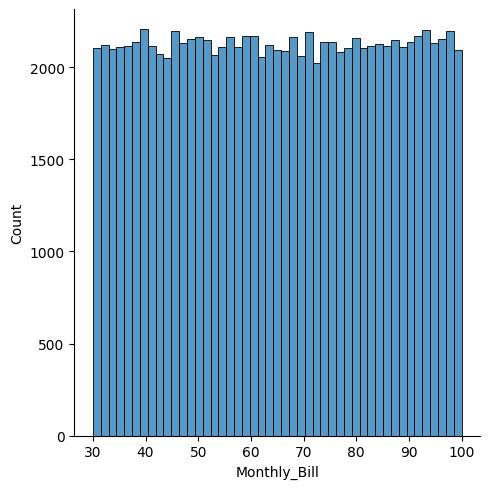

In [48]:
sns.displot(data=df,x=df.Monthly_Bill)

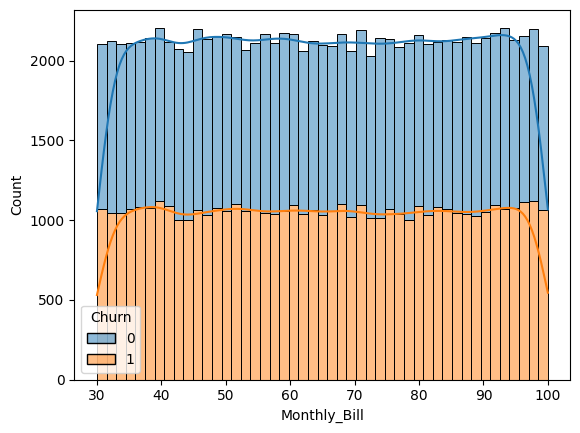

In [60]:
sns.histplot(data=df, x='Monthly_Bill', hue='Churn', multiple='stack', kde=True)
plt.show()

<AxesSubplot:>

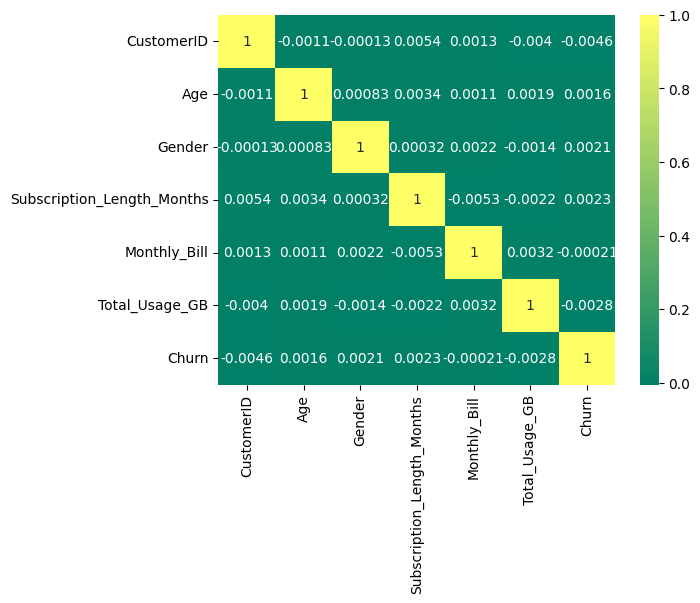

In [74]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='summer')

In [81]:
cat_col = ['Gender','Location']

ohe = OneHotEncoder(sparse=False)
onehot=ohe.fit_transform(df[cat_col])

In [85]:
onehot.shape

(100000, 7)

In [86]:
ohe.categories_

# ['Female','Male' ,'Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York']

[array([0, 1], dtype=int64),
 array(['Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York'],
       dtype=object)]

In [87]:
df_onehot=pd.DataFrame(onehot, columns=['Female','Male' ,'Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York'] )

In [88]:
df_onehot

,Female,Male,Chicago,Houston,Los Angeles,Miami,New York
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,1.0,0.0,0.0,0.0
99996,1.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99998,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
#scaling

scaling_col = ['Monthly_Bill', 'Subscription_Length_Months']
sc = StandardScaler()
scaled_features = sc.fit_transform(df[scaling_col])

In [92]:
df_scaled = pd.DataFrame(scaled_features, columns=scaling_col)

In [93]:
df_scaled.head()

,Monthly_Bill,Subscription_Length_Months
0,0.410606,0.651115
1,-0.805374,-1.658879
2,1.009204,-1.081380
3,1.625597,-1.370129
4,-0.341720,0.939864


In [99]:
df_processed = pd.concat([df_scaled, df_onehot], axis=1)

In [105]:
type(df_scaled)

pandas.core.frame.DataFrame

In [116]:
df_processed.head()

,Monthly_Bill,Subscription_Length_Months,Female,Male,Chicago,Houston,Los Angeles,Miami,New York,Age,Gender,Total_Usage_GB,Churn
0,0.410606,0.651115,0.0,1.0,0.0,0.0,1.0,0.0,0.0,63,1,236,0
1,-0.805374,-1.658879,1.0,0.0,0.0,0.0,0.0,0.0,1.0,62,0,172,0
2,1.009204,-1.081380,1.0,0.0,0.0,0.0,1.0,0.0,0.0,24,0,460,0
3,1.625597,-1.370129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,36,0,297,1
4,-0.341720,0.939864,1.0,0.0,0.0,0.0,0.0,1.0,0.0,46,0,266,0


In [113]:
df_processed['Age'] = df['Age'].values
df_processed['Gender'] = df['Gender'].values
df_processed['Total_Usage_GB'] = df['Total_Usage_GB'].values
df_processed['Churn'] = df['Churn'].values

In [107]:
df[['Age','Gender','Total_Usage_GB','Churn']]

pandas.core.frame.DataFrame

In [117]:
X = df_processed.drop(columns=['Churn'])
y = df_processed['Churn']

In [118]:
X.head()

,Monthly_Bill,Subscription_Length_Months,Female,Male,Chicago,Houston,Los Angeles,Miami,New York,Age,Gender,Total_Usage_GB
0,0.410606,0.651115,0.0,1.0,0.0,0.0,1.0,0.0,0.0,63,1,236
1,-0.805374,-1.658879,1.0,0.0,0.0,0.0,0.0,0.0,1.0,62,0,172
2,1.009204,-1.081380,1.0,0.0,0.0,0.0,1.0,0.0,0.0,24,0,460
3,1.625597,-1.370129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,36,0,297
4,-0.341720,0.939864,1.0,0.0,0.0,0.0,0.0,1.0,0.0,46,0,266


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((80000, 12), (20000, 12), (80000,), (20000,))

In [120]:
#Create the Model
# Logistic Regression Model
logregmodel = LogisticRegression()

In [121]:

#Train the Model
# Use the .fit method
logregmodel = LogisticRegression()
logregmodel.fit(X_train, y_train)

LogisticRegression()

In [122]:

#Predict on a unknown dataset (Testset)
# Use .predict method # .predict_proba is available just for classification
logreg_predict=logregmodel.predict(X_test)

In [124]:

#Find Accuracy
# use the accuracy_score method
logregmodel_accuracy = round(accuracy_score(y_test,logreg_predict)*100,2)
print(logregmodel_accuracy)

50.5


In [125]:

#Creating confusion matrix
ConfusionMatrix_logreg = confusion_matrix(y_test, logreg_predict)
print(ConfusionMatrix_logreg)

[[8399 1621]
 [8280 1700]]


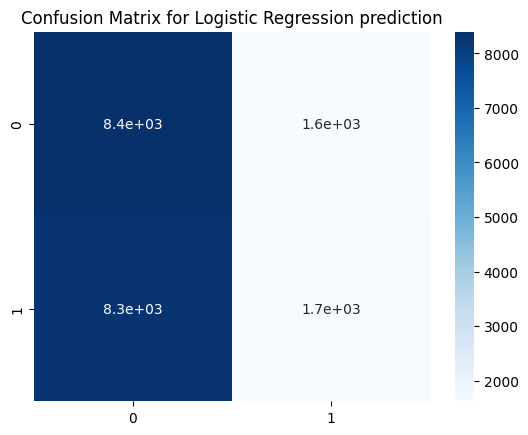

In [129]:
matrix_logreg=sns.heatmap(ConfusionMatrix_logreg,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression prediction')
plt.show(matrix_logreg)
plt.show()

# Here --)) New section

In [7]:
df = pd.DataFrame(df_orignals, columns=df_orignals.columns)

In [8]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [9]:
df = df.drop(columns=['Name'])

In [10]:
df.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0


In [8]:
df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [11]:
le = LabelEncoder()
df_G = le.fit_transform(df['Gender'])
df_L = le.fit_transform(df['Location'])

In [12]:
df['Gender'] = df_G
df['Location'] = df_L

In [28]:
sc = StandardScaler()
sc_SM = sc.fit_transform(df[['Subscription_Length_Months','Monthly_Bill']])

sc_SM[:,1].shape # Monthly_Bill
sc_SM[:,0].shape # Subscription_Length_Months

df['Subscription_Length_Months'] = sc_SM[:,0]
df['Monthly_Bill'] = sc_SM[:,1]

In [13]:
mm = MinMaxScaler()
mm_SM = mm.fit_transform(df[['Subscription_Length_Months','Monthly_Bill']])

# mm_SM[:,2].shape # Total_Usage_GB
mm_SM[:,1].shape # Monthly_Bill
mm_SM[:,0].shape # Subscription_Length_Months

df['Subscription_Length_Months'] = mm_SM[:,0]
df['Monthly_Bill'] = mm_SM[:,1]
# df['Total_Usage_GB'] = mm_SM[:,2]

In [64]:
df = mm.fit_transform(df)

In [12]:
df.shape

(100000, 8)

In [67]:
df = pd.DataFrame(df, columns=['CustomerID','Age', 'Gender', 'Location','Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB','Churn'])

In [68]:
# ['CustomerID','Age', 'Gender', 'Location','Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB','Churn']

In [115]:
df.shape

(100000, 8)

In [14]:
df.head(10)

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,1,2,0.695652,0.619429,236,0
1,2,62,0,4,0.000000,0.268000,172,0
2,3,24,0,2,0.173913,0.792429,460,0
3,4,36,0,3,0.086957,0.970571,297,1
4,5,46,0,3,0.782609,0.402000,266,0
5,6,67,1,4,0.608696,0.752143,456,1
6,7,30,0,0,0.086957,0.625571,269,0
7,8,67,0,3,0.000000,0.967143,396,1
8,9,20,0,3,0.391304,0.177857,150,1
9,10,53,0,2,0.478261,0.492714,383,1


In [15]:
X = df.drop(columns=['Churn','CustomerID'])
y = df['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((80000, 6), (20000, 6), (80000,), (20000,))

In [17]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [64]:
base_accuracy = accuracy_score(y_test, clf.predict(X_test))

In [22]:
# Define the hyperparameter grid to search through
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2','elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

In [23]:
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [24]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [25]:
accuracy_score(y_test,grid_search.predict(X_test))

0.5053

In [26]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [28]:
best_grid = grid_search.best_estimator_

In [62]:
grid_accuracy = accuracy_score(y_test, grid_search.predict(X_test))

In [65]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


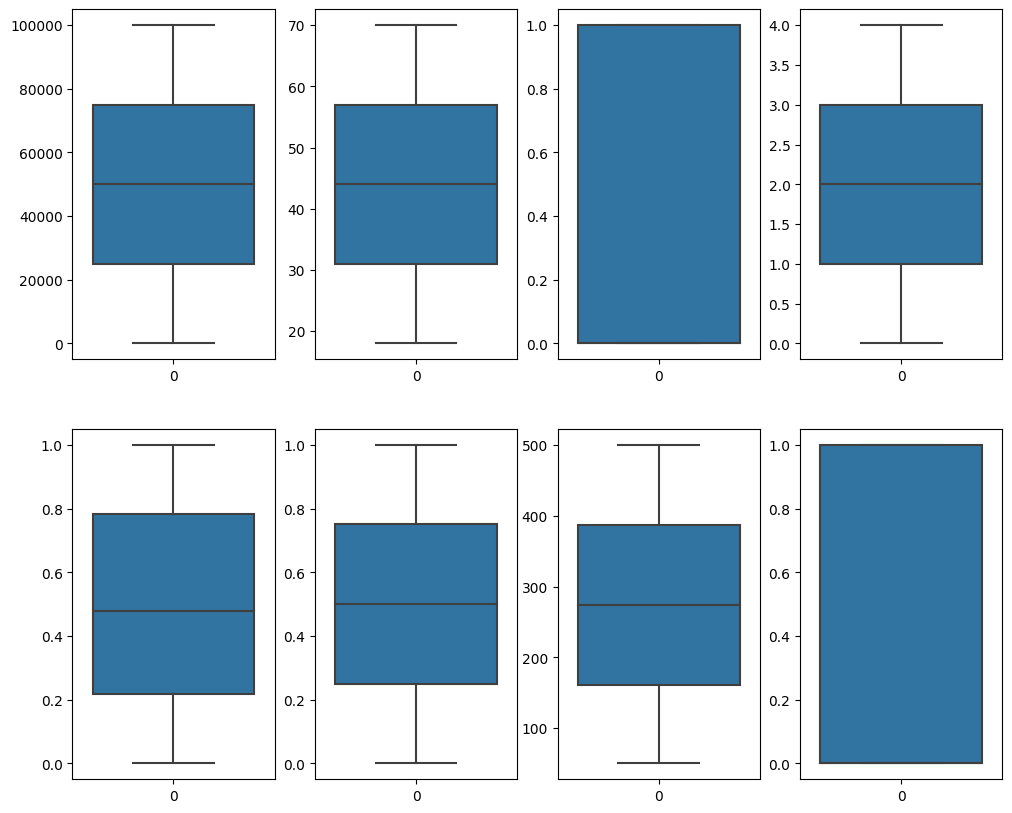

In [18]:
plt.figure(figsize=(12,10))
plotnumber=1
for i in df.columns:
    ax = plt.subplot(2,4,plotnumber)
    sns.boxplot(df[i])
    plotnumber += 1

In [66]:
# sns.distplot(df[df['Age']>=65])
df[df['Age']>=65].shape  

(11249, 8)

In [67]:
# sns.distplot(df[df['Age']<65])
df[df['Age']<65].shape

(88751, 8)

In [68]:
senior_citizen = np.where(df['Age']>65, 1, 0)

In [69]:
senior_citizen.shape

(100000,)

In [70]:
senior_citizen[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
df['senior_citizen'] = senior_citizen

In [72]:
df['Total_Usage_GB'].min()

50

In [73]:
df.head(7)

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,senior_citizen
0,1,63,1,2,0.695652,0.619429,236,0,0
1,2,62,0,4,0.000000,0.268000,172,0,0
2,3,24,0,2,0.173913,0.792429,460,0,0
3,4,36,0,3,0.086957,0.970571,297,1,0
4,5,46,0,3,0.782609,0.402000,266,0,0
5,6,67,1,4,0.608696,0.752143,456,1,1
6,7,30,0,0,0.086957,0.625571,269,0,0


In [74]:
df['senior_citizen'].value_counts()

0    90584
1     9416
Name: senior_citizen, dtype: int64

In [82]:
def model_results(df):
    X = df.drop(columns=['Churn','CustomerID','Gender','Monthly_Bill','Subscription_Length_Months'])
    y = df['Churn']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    display( X_train.shape , X_test.shape , y_train.shape , y_test.shape )
    
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.coef_)
    
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test,y_pred ))
    
    plt.figure(figsize=(12,5))
    plt.bar(X_train.columns.values.tolist(), clf.coef_[0].tolist())
    
    

(80000, 4)

(20000, 4)

(80000,)

(20000,)

[[ 1.65513916e-04  2.55036550e-05 -5.78902494e-05  4.45627272e-06]]
0.5053
17.08639748993403


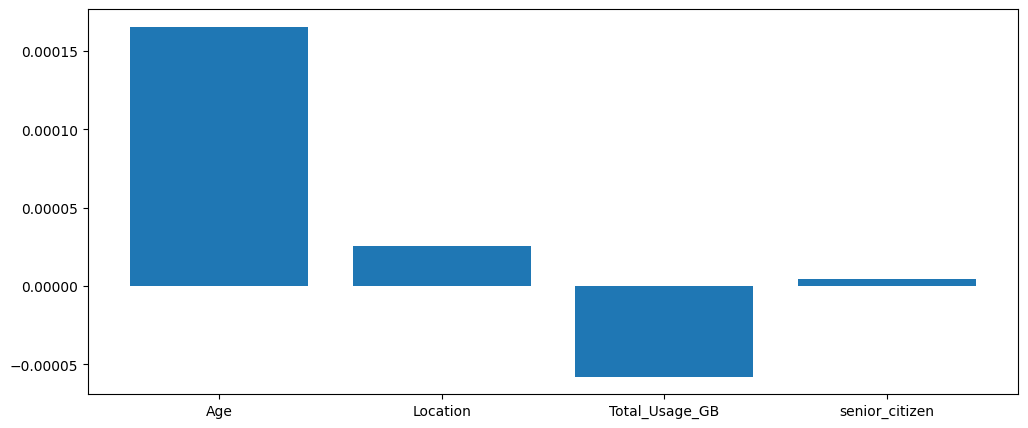

In [83]:
model_results(df)

In [85]:
def model_results_sgd(df):
    X = df.drop(columns=['Churn','CustomerID','Gender','Monthly_Bill','Subscription_Length_Months'])
    y = df['Churn']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    display( X_train.shape , X_test.shape , y_train.shape , y_test.shape )
    
    clf = SGDClassifier()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.coef_)
    
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test,y_pred ))
    
#     plt.figure(figsize=(12,5))
#     plt.bar(X_train.columns.values.tolist(), clf.coef_[0].tolist())
    
    

In [86]:
model_results_sgd(df)

(80000, 4)

(20000, 4)

(80000,)

(20000,)

[[ 0.00662423  0.10368365 -0.05500994  0.21370353]]
0.501
17.23484942106043


<AxesSubplot:xlabel='senior_citizen', ylabel='CustomerID'>

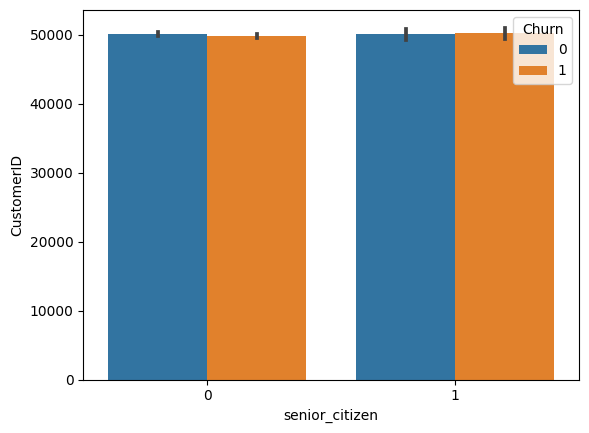

In [78]:
# sns.barplot(data=df, x='Churn', y='CustomerID', hue='senior_citizen')
sns.barplot(data=df, y='CustomerID', x='senior_citizen',hue='Churn')
# plt.legend(df['Churn'])